In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared

import matplotlib.pyplot as plt

In [81]:
from turboflow.dataloaders import load_turbo2D_simple_numpy

In [86]:
X, y = load_turbo2D_simple_numpy(ds=8)
print(X.shape)
print(y.shape)

Y shape (32, 32, 2)
Y min, max: -2.269798 2.822772
after normalization, Y min, max: -0.8041024921601887 1.0
(1024, 2)
(1024, 2)


In [93]:
kernel = 1.0 * RBF(.3,)
gpc = GaussianProcessRegressor(
            kernel=kernel,
            random_state=0)
gpc.fit(X, y[:,0])

/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.3), random_state=0)

In [94]:
gpc.score(X, y[:,0])

1.0

[[0.         0.        ]
 [0.         0.00392157]
 [0.         0.00784314]
 ...
 [1.         0.99215686]
 [1.         0.99607843]
 [1.         1.        ]]
[[-4.52295597e-08 -1.37578885e-08]
 [-4.52295593e-08 -1.37578884e-08]
 [-4.52295588e-08 -1.37578883e-08]
 ...
 [-4.52295545e-08 -1.37578715e-08]
 [-4.52295549e-08 -1.37578718e-08]
 [-4.52295552e-08 -1.37578721e-08]]


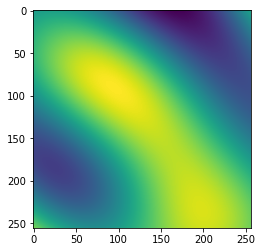

In [75]:
ngrid = 256
coords = np.linspace(0, 1, ngrid)
coords = np.stack(np.meshgrid(coords, coords), -1) # X x Y x 2
tmp = coords[:,:,0].copy()
coords[:,:,0] = coords[:,:,1]
coords[:,:,1] = tmp
coords = coords.reshape(ngrid*ngrid,2)

y_pred = gpc.predict(coords)

print(coords)
print(y_pred)

plt.imshow(y_pred[:,1].reshape(ngrid,ngrid))

In [ ]:
def my_kernel(X, Y, sigma2=1):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    dist = 
    return np.dot(np.dot(X, M), Y.T)